# Using Data Analysis Techniques and Machine Learning to Search for Dark Matter (IN PROGRESS)

## Introduction, etc. here

In [1]:
import pandas as pd #So we can store data in DataFrames (an object type that makes for easier analysis)
import numpy as np #used for calculations
import uproot3 #allows us to accesss the data within the files we are using
import matplotlib.pyplot as plt #used for plotting graphs

In [2]:
data_path = 'C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_306109.dmV_Zll_MET40_DM1_MM800.exactly2lep.root'
#notice this is in the .root format used for CERN data, so we need the uproot3 module to access it

Data from: https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/exactly2lep/MC/

In [3]:
file_open = uproot3.open(data_path)["mini"] #open data file (whats mini?)

In [1]:
keys = file_open.keys()
show = file_open.show()
#these two are similar and show the labels of all the columns of data
print(keys)

NameError: name 'file_open' is not defined

In [6]:
data_dict = {} #dictionary to hold all the data that we will be looking at


#relevant_data = ['runNumber','eventNumber','channelNumber','mcWeight','lep_n','lep_truthMatched','lep_trigMatched',
#                'lep_pt','lep_eta','lep_phi','lep_E','lep_z0','lep_charge','lep_type','lep_isTightID','lep_ptcone30',
#                 'lep_etcone20','lep_trackd0pvunbiased','lep_tracksigd0pvunbiased','met_et','lep_pt_syst','XSection',
#                 'SumWeights']
relevant_data = ['mcWeight','lep_truthMatched','lep_trigMatched','lep_pt','lep_eta','lep_phi','lep_E','lep_z0','lep_charge',
                 'lep_type','lep_isTightID','lep_ptcone30','lep_etcone20','lep_trackd0pvunbiased','lep_tracksigd0pvunbiased',
                 'met_et','met_phi','jet_pt','jet_eta','jet_phi','jet_E','jet_jvt','lep_pt_syst','XSection','SumWeights'
                ,'jet_MV2c10','scaleFactor_PILEUP','scaleFactor_ELE','scaleFactor_MUON','scaleFactor_LepTRIGGER']#,
                #'scaleFactor_BTAG']
# these are the headings of the columns of data that we will be looking at
relevant_data_locations = [3,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,63,68,69,40,4,5,6,10]#,9]


#the below lines read the data that we are going to use into the dictionary above
counter = 0
for i in relevant_data_locations:
    data_dict[relevant_data[counter]] = file_open.array(keys[i]) 
    #creates a new key in the dictionary using the entries in relevant_data, and adds the corresponding data values by opening
    #the right array of data (using the column number given in relevant_data_locations)
    counter+=1
    

#data_dict
#uncomment above to view the dictionary

In [7]:
raw_data_df = pd.DataFrame(data_dict) #makes a DataFrame from the constructed dictionary
raw_data_df #view the dataframe

,mcWeight,lep_truthMatched,lep_trigMatched,lep_pt,lep_eta,lep_phi,lep_E,lep_z0,lep_charge,lep_type,...,jet_E,jet_jvt,lep_pt_syst,XSection,SumWeights,jet_MV2c10,scaleFactor_PILEUP,scaleFactor_ELE,scaleFactor_MUON,scaleFactor_LepTRIGGER
0,1.0,"[True, False]","[True, False]","[100990.07, 7426.121]","[-0.7682709, 0.72368354]","[-1.0182151, -2.1507058]","[132289.39, 9457.081]","[-0.007511139, 70.42823]","[-1, 1]","[11, 11]",...,"[282176.62, 43395.41]","[0.9320634, 0.9823455]","[668.81635, 66.78632]",0.005016,10000.0,"[-0.6214516, -0.90312195]",0.000000,0.999401,1.000000,0.991800
1,1.0,"[True, True]","[True, True]","[93777.734, 31697.932]","[-0.5999321, -0.89178747]","[0.17214498, -1.7731516]","[111166.234, 45160.305]","[-0.009235382, -0.05092621]","[1, -1]","[13, 13]",...,[31205.533],[0.9578295],"[2037.9049, 107.43644]",0.005016,10000.0,[-0.9280853],0.351687,1.000000,0.988459,0.844503
2,1.0,"[True, True]","[True, True]","[84696.75, 68743.09]","[1.1828485, 1.098033]","[0.37650913, -0.83802056]","[151186.33, 114518.74]","[0.016830444, 0.038887024]","[1, -1]","[11, 11]",...,[],[],"[428.07352, 308.5227]",0.005016,10000.0,[],0.351687,0.952505,1.000000,0.995440
3,1.0,"[True, True]","[True, False]","[95645.26, 22749.984]","[0.03707598, -0.2220163]","[-0.08936702, 2.6688776]","[95711.0, 23312.979]","[-0.06022644, -0.016189575]","[1, -1]","[11, 11]",...,[],[],"[1129.4507, 80.28829]",0.005016,10000.0,[],0.619412,0.928129,1.000000,0.987430
4,1.0,"[True, True]","[True, False]","[128806.86, 15045.653]","[-0.34280708, -0.80403394]","[-2.7522888, -0.12069551]","[136449.75, 20176.648]","[0.022433758, -0.01040411]","[-1, 1]","[11, 11]",...,[],[],"[497.85922, 170.0829]",0.005016,10000.0,[],0.619412,0.888741,1.000000,1.005820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5201,1.0,"[True, True]","[True, True]","[72181.87, 51158.71]","[0.5563412, -0.18103471]","[3.0907967, 1.6497777]","[83643.75, 51999.438]","[-0.0039405823, -0.07788658]","[-1, 1]","[13, 13]",...,[],[],"[706.1843, 566.79584]",0.005016,10000.0,[],0.619412,1.000000,0.989440,0.931335
5202,1.0,"[True, True]","[True, False]","[306378.8, 21968.338]","[0.6307145, 0.52217853]","[-2.6945016, -1.5103921]","[369364.78, 25032.295]","[-0.027526855, 0.024856567]","[1, -1]","[13, 13]",...,[68827.55],[0.9903708],"[37542.293, 155.38966]",0.005016,10000.0,[-0.9310036],0.553627,1.000000,0.991033,0.967734
5203,1.0,"[True, True]","[True, True]","[70584.914, 54114.15]","[-1.3256004, -1.0071476]","[-1.9375601, 3.0470493]","[142231.75, 83959.25]","[-0.09175873, -0.05001068]","[1, -1]","[13, 13]",...,[],[],"[683.6778, 116.885124]",0.005016,10000.0,[],0.553627,1.000000,0.995088,0.983870
5204,1.0,"[True, True]","[True, True]","[102851.836, 31841.15]","[1.6040598, 1.010763]","[0.39593637, 2.0243583]","[266091.1, 49539.066]","[-0.028175354, -0.019233704]","[-1, 1]","[11, 11]",...,[25521.875],[0.7149265],"[1874.4982, 65.11265]",0.005016,10000.0,[-0.8792909],0.000000,0.933914,1.000000,1.012650


In [8]:
for i in raw_data_df:
    print(i)

mcWeight
lep_truthMatched
lep_trigMatched
lep_pt
lep_eta
lep_phi
lep_E
lep_z0
lep_charge
lep_type
lep_isTightID
lep_ptcone30
lep_etcone20
lep_trackd0pvunbiased
lep_tracksigd0pvunbiased
met_et
met_phi
jet_pt
jet_eta
jet_phi
jet_E
jet_jvt
lep_pt_syst
XSection
SumWeights
jet_MV2c10
scaleFactor_PILEUP
scaleFactor_ELE
scaleFactor_MUON
scaleFactor_LepTRIGGER


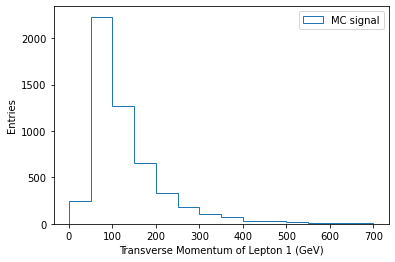

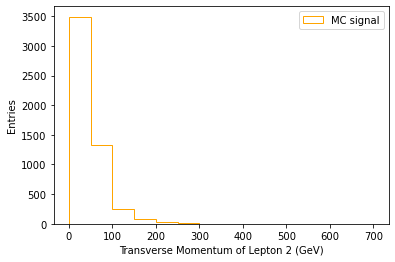

In [9]:
lep1PT = []
lep2PT = []
for i in raw_data_df['lep_pt']:
    lep1PT.append(i[0]*0.001)#decrease by a factor of 10^3 for TeV -> GeV
    lep2PT.append(i[1]*0.001)
    
lep1PT_hist = plt.hist(lep1PT, bins=np.linspace(0,700,15), histtype='step', label='MC signal')
plt.xlabel('Transverse Momentum of Lepton 1 (GeV)')
plt.ylabel('Entries')
plt.legend()
plt.show()
lep2PT_hist = plt.hist(lep2PT, bins=np.linspace(0,700,15), histtype='step', color='orange', label='MC signal')
plt.xlabel('Transverse Momentum of Lepton 2 (GeV)')
plt.ylabel('Entries')
plt.legend()
plt.show()

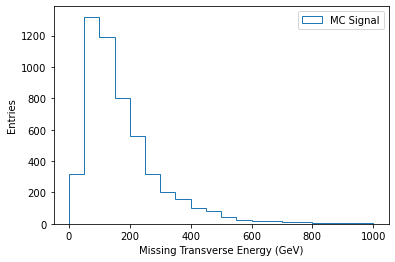

In [10]:
lepMET_hist = plt.hist(raw_data_df['met_et']*0.001, bins=np.linspace(0,1000,21), histtype='step', label='MC Signal')
plt.xlabel('Missing Transverse Energy (GeV)')
plt.ylabel('Entries')
plt.legend()
plt.show()

## Making cuts on the dataset

First we'll double check how much data there is

### FIRST WE'LL ACTUALLY PUT IN THE BG MC

In [10]:
#ZZ background MC
llvv_dict = {}
#llvv_open = 
counter = 0
for i in relevant_data_locations:
    llvv_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_363492.llvv.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
llvv_df = pd.DataFrame(llvv_dict)

## DONT WORK WITH ANY OF THE BELOW CELLS OPENING THE BG MC (for now) - FOR THE SAKE OF YOUR PC

In [11]:
#WZ background MC
lllv_dict = {}
counter = 0
for i in relevant_data_locations:
    lllv_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_363491.lllv.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
lllv_df = pd.DataFrame(lllv_dict)
    
lvvv_dict = {}
counter = 0
for i in relevant_data_locations:
    lvvv_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_363493.lvvv.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
lvvv_df = pd.DataFrame(lvvv_dict)
    
WlvZqq_dict = {}
counter = 0
for i in relevant_data_locations:
    WlvZqq_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_363489.WlvZqq.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
WlvZqq_df = pd.DataFrame(WlvZqq_dict)
    
WqqZll_dict = {}
counter = 0
for i in relevant_data_locations:
    WqqZll_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_363358.WqqZll.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
WqqZll_df = pd.DataFrame(WqqZll_dict)

In [ ]:
#Z+jets backgorund MC
Zee_dict = {}
counter = 0
for i in relevant_data_locations:
    Zee_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_361106.Zee.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
Zee_df = pd.DataFrame(Zee_dict)

Zmumu_dict = {}
counter = 0
for i in relevant_data_locations:
    Zmumu_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_361107.Zmumu.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
Zmumu_df = pd.DataFrame(Zmumu_dict)

In [ ]:
#top background MC
single_top_tchan_dict = {}
counter = 0
for i in relevant_data_locations:
    single_top_tchan_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_410011.single_top_tchan.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
single_top_tchan_df = pd.DataFrame(single_top_tchan_dict)

single_antitop_tchan_dict = {}
counter = 0
for i in relevant_data_locations:
    single_antitop_tchan_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_410012.single_antitop_tchan.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
single_antitop_tchan_df = pd.DataFrame(single_antitop_tchan_dict)

single_top_wtchan_dict = {}
counter = 0
for i in relevant_data_locations:
    single_top_wtchan_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_410013.single_top_wtchan.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
single_top_wtchan_df = pd.DataFrame(single_top_wtchan_dict)

single_antitop_wtchan_dict = {}
counter = 0
for i in relevant_data_locations:
    single_antitop_wtchan_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_410014.single_antitop_wtchan.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
single_antitop_wtchan_df = pd.DataFrame(single_antitop_wtchan_dict)

single_top_schan_dict = {}
counter = 0
for i in relevant_data_locations:
    single_top_schan_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_410025.single_top_schan.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
single_top_schan_df = pd.DataFrame(single_top_schan_dict)

single_antitop_schan_dict = {}
counter = 0
for i in relevant_data_locations:
    single_antitop_schan_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_410026.single_antitop_schan.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
single_antitop_schan_df = pd.DataFrame(single_antitop_schan_dict)

In [ ]:
#Ztt (Ztautau) background MC
Ztautau_dict = {}
counter = 0
for i in relevant_data_locations:
    Ztautau_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_361108.Ztautau.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
Ztautau_df = pd.DataFrame(Ztautau_dict)

In [ ]:
#WW background MC
WpqqWmlv_dict = {}
counter = 0
for i in relevant_data_locations:
    WpqqWmlv_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_363359.WpqqWmlv.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
WpqqWmlv_df = pd.DataFrame(WpqqWmlv_dict)

WplvWmqq_dict = {}
counter = 0
for i in relevant_data_locations:
    WplvWmqq_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_363360.WplvWmqq.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
WplvWmqq_df = pd.DataFrame(WplvWmqq_dict)

In [ ]:
#W+jets background MC
Wplusenu_dict = {}
counter = 0
for i in relevant_data_locations:
    Wplusenu_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_361100.Wplusenu.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
Wplusenu_df = pd.DataFrame(Wplusenu_dict)

Wplusmunu_dict = {}
counter = 0
for i in relevant_data_locations:
    Wplusmunu_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_361101.Wplusmunu.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
Wplusmunu_df = pd.DataFrame(Wplusmunu_dict)

Wplustaunu_dict = {}
counter = 0
for i in relevant_data_locations:
    Wplustaunu_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_361102.Wplustaunu.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
Wplustaunu_df = pd.DataFrame(Wplustaunu_dict)

Wminusenu_dict = {}
counter = 0
for i in relevant_data_locations:
    Wminusenu_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_361103.Wminusenu.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
Wminusenu_df = pd.DataFrame(Wminusenu_dict)

Wminusmunu_dict = {}
counter = 0
for i in relevant_data_locations:
    Wminusmunu_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_361104.Wminusmunu.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
Wminusmunu_df = pd.DataFrame(Wminusmunu_dict)

Wminustaunu_dict = {}
counter = 0
for i in relevant_data_locations:
    Wminustaunu_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_361105.Wminustaunu.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
Wminustaunu_df = pd.DataFrame(Wminustaunu_dict)

In [ ]:
#ttV background MC
ttW_dict = {}
counter = 0
for i in relevant_data_locations:
    ttW_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_410155.ttW.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
ttW_df = pd.DataFrame(ttW_dict)
    
ttee_dict = {}
counter = 0
for i in relevant_data_locations:
    ttee_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_410218.ttee.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
ttee_df = pd.DataFrame(ttee_dict)
    
ttmumu_dict = {}
counter = 0
for i in relevant_data_locations:
    ttmumu_dict[relevant_data[counter]] = uproot3.open('C:\\Users\\Chris\\Desktop\\Internship\\Data\\mc_410219.ttmumu.exactly2lep.root')["mini"].array(keys[i]) 
    counter+=1
ttmumu_df = pd.DataFrame(ttmumu_dict)

In [ ]:
#The below list is of all the background MC and each file contains all the same data columns as the MC signal
bg_mc_names = ['363492.llvv','363491.lllv','363493.lvvv','363489.WlvZqq','363358.WqqZll','361106.Zee','361107.Zmumu',
               '410011.single_top_tchan','410012.single_antitop_tchan','410013.single_top_wtchan','410014.single_antitop_wtchan'
               ,'410025.single_top_schan','410026.single_antitop_schan','361108.Ztautau','363359.WpqqWmlv','363360.WplvWmqq',
              '361100.Wplusenu','361101.Wplusmunu','361102.Wplustaunu','361103.Wminusenu','361104.Wminusmunu',
               '361105.Wminustaunu','410155.ttW','410218.ttee','410219.ttmumu']

#dictionaries to contain the data for all the bg MC
#we will read data into these dictionaries using the same method as above

## CONTINUE AS NORMAL USING ONLY ONE BG MC (FOR ZZ)

We need to add a total weights column to the signal and background MC to be able tof find the signal to background ratio

In [11]:
llvv_df

,mcWeight,lep_truthMatched,lep_trigMatched,lep_pt,lep_eta,lep_phi,lep_E,lep_z0,lep_charge,lep_type,...,jet_E,jet_jvt,lep_pt_syst,XSection,SumWeights,jet_MV2c10,scaleFactor_PILEUP,scaleFactor_ELE,scaleFactor_MUON,scaleFactor_LepTRIGGER
0,0.104969,"[True, True]","[True, True]","[66719.21, 38223.332]","[0.3023575, 1.4662564]","[2.448181, -2.912213]","[69792.25, 87221.34]","[0.025497437, 0.060962677]","[1, -1]","[11, 13]",...,"[502564.0, 195443.3, 81640.984, 38168.805, 795...","[0.9954332, 0.98083514, 0.99522156, 0.7396009,...","[114.96441, 253.74883]",12.466,5039260.0,"[-0.4067991, -0.84126496, -0.9187099, -0.73590...",0.351687,0.977380,1.001090,1.000560
1,0.643866,"[False, True]","[True, True]","[29149.914, 29030.73]","[1.1029727, -0.051655646]","[1.4237683, 1.1282893]","[48753.13, 29069.662]","[-0.07538986, 0.018318176]","[-1, 1]","[11, 13]",...,[32463.81],[1.0],"[150.17276, 74.33821]",12.466,5039260.0,[-0.3509991],1.087349,0.950550,0.994404,0.977310
2,0.138019,"[True, True]","[True, True]","[52254.113, 43302.742]","[-0.6182232, -1.7384257]","[2.9409459, -0.19445567]","[62562.0, 126967.55]","[0.048130035, 0.039821625]","[1, -1]","[11, 13]",...,[39832.88],[0.997857],"[55.403984, 259.87164]",12.466,5039260.0,[-0.9265425],1.745631,0.966600,0.986746,0.954980
3,1.000000,"[True, True]","[True, True]","[33380.016, 29918.826]","[0.24622504, 0.042297646]","[-2.3398328, 1.883797]","[34397.0, 29945.594]","[0.1483388, 0.0696311]","[1, -1]","[11, 11]",...,[],[],"[23.30728, 153.75331]",12.466,5039260.0,[],1.554649,0.914097,1.000000,0.948390
4,0.128125,"[True, True]","[True, True]","[36902.188, 31770.463]","[1.1146672, 1.0253009]","[0.70942724, -0.66114825]","[62301.645, 49984.83]","[0.010108948, -0.0099487305]","[-1, 1]","[13, 11]",...,"[90056.37, 58171.625]","[0.99199384, 0.98889524]","[160.68677, 218.34625]",12.466,5039260.0,"[-0.82874006, -0.5805102]",1.241677,0.957340,1.000304,0.972560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389175,0.119263,"[True, True]","[True, True]","[118607.414, 94439.586]","[1.1818022, 0.44610128]","[-1.1370046, -1.8491415]","[211534.53, 103993.5]","[0.009380341, 0.021263123]","[1, -1]","[11, 11]",...,"[1563718.5, 115188.61]","[0.99653107, 0.99660873]","[809.8102, 626.6323]",12.466,5039260.0,"[-0.9509517, -0.85260785]",0.619412,0.955238,1.000000,0.995440
3389176,0.100000,"[True, True]","[False, True]","[102127.46, 88736.11]","[-0.74553764, -2.051576]","[-1.5200887, 1.5907942]","[131849.31, 350892.94]","[0.06912804, 0.061903954]","[-1, 1]","[13, 11]",...,[49564.688],[0.97973734],"[4215.5737, 518.52686]",12.466,5039260.0,[-0.70130503],0.553627,0.981780,0.993241,0.996040
3389177,0.100605,"[True, False]","[True, False]","[103310.0, 13661.678]","[0.8652747, 0.21771964]","[-2.5068283, -2.1389017]","[144458.12, 13987.152]","[-0.0015878677, -0.1763823]","[1, -1]","[13, 13]",...,"[136017.42, 30777.084]","[0.9993637, 0.75295997]","[382.5321, 122.845085]",12.466,5039260.0,"[-0.88155055, -0.6659488]",0.553627,1.000000,0.993054,0.911874
3389178,1.000000,"[True, True]","[True, True]","[35255.027, 25063.988]","[-1.6233085, -0.8550777]","[-2.5809143, -0.1815377]","[92845.61, 34798.934]","[-0.104314804, 0.043174744]","[-1, 1]","[13, 11]",...,[],[],"[169.79926, 126.50499]",12.466,5039260.0,[],0.351687,0.947070,0.974256,1.013708


In [11]:
df_names = [raw_data_df]#, llvv_df]#, lllv_df, lvvv_df, WlvZqq_df, WqqZll_df, Zee_df, Zmumu_df, single_top_tchan_df, 
            #single_antitop_tchan_df, single_top_wtchan_df, single_antitop_wtchan_df, single_top_schan_df, 
            #single_antitop_schan_df, Ztautau_df, WpqqWmlv_df, WplvWmqq_df, Wplusenu_df, Wplusmunu_df, Wplustaunu_df,
            #Wminusenu_df, Wminusmunu_df, Wminustaunu_df, ttW_df, ttee_df, ttmumu_df]

#IN ORDER TO FIND THE TOTAL WEIGHT WE WILL NEED TO DO CALCULATIONS ON ALL THE DATA. THUS WE WILL MAKE A FUNCTION THAT CAN BE
#APPLIED TO ALL DATA USING NP.VECTORISE

def add_xsecW(dfname):
    dfname['XSectionWeight'] = 10*1000*dfname['XSection']/dfname['SumWeights'] 
#10 refers to amount of data we have(10 fb-1), *1000 converts from fb-1 to pb-1

for i in df_names:
    add_xsecW(i)
    
    
def add_Weight(dfname):    
    dfname['Weight'] = dfname['XSectionWeight']*dfname['mcWeight']*dfname['scaleFactor_PILEUP']*dfname['scaleFactor_ELE']*dfname['scaleFactor_MUON']*dfname['scaleFactor_LepTRIGGER']

for i in df_names:
    add_Weight(i)    

#mc_sig = 0
#mc_bg = 0
#for i in range(len(df_names)):
#    if i == 0: #if its the MC signal
#        mc_sig += raw_data_df['SumWeights'][0] #all values are the same
#    else:
#        mc_bg += llvv_df['SumWeights'][0]

In [12]:
new_relevant_data = ['mcWeight','lep_truthMatched','lep_trigMatched','lep_pt','lep_eta','lep_phi','lep_E','lep_z0','lep_charge',
                 'lep_type','lep_isTightID','lep_ptcone30','lep_etcone20','lep_trackd0pvunbiased','lep_tracksigd0pvunbiased',
                 'met_et','met_phi','jet_pt','jet_eta','jet_phi','jet_E','jet_jvt','lep_pt_syst','XSection','SumWeights'
                ,'jet_MV2c10','scaleFactor_PILEUP','scaleFactor_ELE','scaleFactor_MUON','scaleFactor_LepTRIGGER',
                     'XSectionWeight','Weight']

In [11]:
raw_data_df #why have I put this twice??

,mcWeight,lep_truthMatched,lep_trigMatched,lep_pt,lep_eta,lep_phi,lep_E,lep_z0,lep_charge,lep_type,...,lep_pt_syst,XSection,SumWeights,jet_MV2c10,scaleFactor_PILEUP,scaleFactor_ELE,scaleFactor_MUON,scaleFactor_LepTRIGGER,XSectionWeight,Weight
0,1.0,"[True, False]","[True, False]","[100990.07, 7426.121]","[-0.7682709, 0.72368354]","[-1.0182151, -2.1507058]","[132289.39, 9457.081]","[-0.007511139, 70.42823]","[-1, 1]","[11, 11]",...,"[668.81635, 66.78632]",0.005016,10000.0,"[-0.6214516, -0.90312195]",0.000000,0.999401,1.000000,0.991800,0.005016,0.000000
1,1.0,"[True, True]","[True, True]","[93777.734, 31697.932]","[-0.5999321, -0.89178747]","[0.17214498, -1.7731516]","[111166.234, 45160.305]","[-0.009235382, -0.05092621]","[1, -1]","[13, 13]",...,"[2037.9049, 107.43644]",0.005016,10000.0,[-0.9280853],0.351687,1.000000,0.988459,0.844503,0.005016,0.001473
2,1.0,"[True, True]","[True, True]","[84696.75, 68743.09]","[1.1828485, 1.098033]","[0.37650913, -0.83802056]","[151186.33, 114518.74]","[0.016830444, 0.038887024]","[1, -1]","[11, 11]",...,"[428.07352, 308.5227]",0.005016,10000.0,[],0.351687,0.952505,1.000000,0.995440,0.005016,0.001673
3,1.0,"[True, True]","[True, False]","[95645.26, 22749.984]","[0.03707598, -0.2220163]","[-0.08936702, 2.6688776]","[95711.0, 23312.979]","[-0.06022644, -0.016189575]","[1, -1]","[11, 11]",...,"[1129.4507, 80.28829]",0.005016,10000.0,[],0.619412,0.928129,1.000000,0.987430,0.005016,0.002847
4,1.0,"[True, True]","[True, False]","[128806.86, 15045.653]","[-0.34280708, -0.80403394]","[-2.7522888, -0.12069551]","[136449.75, 20176.648]","[0.022433758, -0.01040411]","[-1, 1]","[11, 11]",...,"[497.85922, 170.0829]",0.005016,10000.0,[],0.619412,0.888741,1.000000,1.005820,0.005016,0.002777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5201,1.0,"[True, True]","[True, True]","[72181.87, 51158.71]","[0.5563412, -0.18103471]","[3.0907967, 1.6497777]","[83643.75, 51999.438]","[-0.0039405823, -0.07788658]","[-1, 1]","[13, 13]",...,"[706.1843, 566.79584]",0.005016,10000.0,[],0.619412,1.000000,0.989440,0.931335,0.005016,0.002863
5202,1.0,"[True, True]","[True, False]","[306378.8, 21968.338]","[0.6307145, 0.52217853]","[-2.6945016, -1.5103921]","[369364.78, 25032.295]","[-0.027526855, 0.024856567]","[1, -1]","[13, 13]",...,"[37542.293, 155.38966]",0.005016,10000.0,[-0.9310036],0.553627,1.000000,0.991033,0.967734,0.005016,0.002663
5203,1.0,"[True, True]","[True, True]","[70584.914, 54114.15]","[-1.3256004, -1.0071476]","[-1.9375601, 3.0470493]","[142231.75, 83959.25]","[-0.09175873, -0.05001068]","[1, -1]","[13, 13]",...,"[683.6778, 116.885124]",0.005016,10000.0,[],0.553627,1.000000,0.995088,0.983870,0.005016,0.002719
5204,1.0,"[True, True]","[True, True]","[102851.836, 31841.15]","[1.6040598, 1.010763]","[0.39593637, 2.0243583]","[266091.1, 49539.066]","[-0.028175354, -0.019233704]","[-1, 1]","[11, 11]",...,"[1874.4982, 65.11265]",0.005016,10000.0,[-0.8792909],0.000000,0.933914,1.000000,1.012650,0.005016,0.000000


In [13]:
mc_sig = 0
mc_bg = 0
for i in range(len(df_names)):
    if i==0:
        mc_sig += np.sum((df_names[i])['Weight'])
    else:
        mc_bg += np.sum((df_names[i])['Weight'])

In [56]:
mc_sig

24.41490936279297

In [14]:
mc_sig/mc_bg

0.0009995399552037724

In [15]:
uproot3.numentries(data_path, "mini")

5206

Now let's recap the contents of the dataframe

In [16]:
raw_data_df

,mcWeight,lep_truthMatched,lep_trigMatched,lep_pt,lep_eta,lep_phi,lep_E,lep_z0,lep_charge,lep_type,...,lep_pt_syst,XSection,SumWeights,jet_MV2c10,scaleFactor_PILEUP,scaleFactor_ELE,scaleFactor_MUON,scaleFactor_LepTRIGGER,XSectionWeight,Weight
0,1.0,"[True, False]","[True, False]","[100990.07, 7426.121]","[-0.7682709, 0.72368354]","[-1.0182151, -2.1507058]","[132289.39, 9457.081]","[-0.007511139, 70.42823]","[-1, 1]","[11, 11]",...,"[668.81635, 66.78632]",0.005016,10000.0,"[-0.6214516, -0.90312195]",0.000000,0.999401,1.000000,0.991800,0.005016,0.000000
1,1.0,"[True, True]","[True, True]","[93777.734, 31697.932]","[-0.5999321, -0.89178747]","[0.17214498, -1.7731516]","[111166.234, 45160.305]","[-0.009235382, -0.05092621]","[1, -1]","[13, 13]",...,"[2037.9049, 107.43644]",0.005016,10000.0,[-0.9280853],0.351687,1.000000,0.988459,0.844503,0.005016,0.001473
2,1.0,"[True, True]","[True, True]","[84696.75, 68743.09]","[1.1828485, 1.098033]","[0.37650913, -0.83802056]","[151186.33, 114518.74]","[0.016830444, 0.038887024]","[1, -1]","[11, 11]",...,"[428.07352, 308.5227]",0.005016,10000.0,[],0.351687,0.952505,1.000000,0.995440,0.005016,0.001673
3,1.0,"[True, True]","[True, False]","[95645.26, 22749.984]","[0.03707598, -0.2220163]","[-0.08936702, 2.6688776]","[95711.0, 23312.979]","[-0.06022644, -0.016189575]","[1, -1]","[11, 11]",...,"[1129.4507, 80.28829]",0.005016,10000.0,[],0.619412,0.928129,1.000000,0.987430,0.005016,0.002847
4,1.0,"[True, True]","[True, False]","[128806.86, 15045.653]","[-0.34280708, -0.80403394]","[-2.7522888, -0.12069551]","[136449.75, 20176.648]","[0.022433758, -0.01040411]","[-1, 1]","[11, 11]",...,"[497.85922, 170.0829]",0.005016,10000.0,[],0.619412,0.888741,1.000000,1.005820,0.005016,0.002777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5201,1.0,"[True, True]","[True, True]","[72181.87, 51158.71]","[0.5563412, -0.18103471]","[3.0907967, 1.6497777]","[83643.75, 51999.438]","[-0.0039405823, -0.07788658]","[-1, 1]","[13, 13]",...,"[706.1843, 566.79584]",0.005016,10000.0,[],0.619412,1.000000,0.989440,0.931335,0.005016,0.002863
5202,1.0,"[True, True]","[True, False]","[306378.8, 21968.338]","[0.6307145, 0.52217853]","[-2.6945016, -1.5103921]","[369364.78, 25032.295]","[-0.027526855, 0.024856567]","[1, -1]","[13, 13]",...,"[37542.293, 155.38966]",0.005016,10000.0,[-0.9310036],0.553627,1.000000,0.991033,0.967734,0.005016,0.002663
5203,1.0,"[True, True]","[True, True]","[70584.914, 54114.15]","[-1.3256004, -1.0071476]","[-1.9375601, 3.0470493]","[142231.75, 83959.25]","[-0.09175873, -0.05001068]","[1, -1]","[13, 13]",...,"[683.6778, 116.885124]",0.005016,10000.0,[],0.553627,1.000000,0.995088,0.983870,0.005016,0.002719
5204,1.0,"[True, True]","[True, True]","[102851.836, 31841.15]","[1.6040598, 1.010763]","[0.39593637, 2.0243583]","[266091.1, 49539.066]","[-0.028175354, -0.019233704]","[-1, 1]","[11, 11]",...,"[1874.4982, 65.11265]",0.005016,10000.0,[-0.8792909],0.000000,0.933914,1.000000,1.012650,0.005016,0.000000


In [57]:
len(raw_data_df)

5206

#### Make a dictionary to hold info on the how each cut changes the weight and number of events of the uncut data

In [ ]:
cut_info = {'Filename':['Signal_MM800'],'Original_eventNo':[5206],'Original_sumW':[24.41490936279297],
            'events_invMass_cut':[4944],'sumW_invMass_cut':[23.18094936111902],
            'events_charge_cut':[5146],'sumW_charge_cut':[24.136442950451055],
            'events_prapidity_cut':[5197],'sumW_prapidity_cut':[],
           'events_leppt_cut':[4429],'sumW_leppt_cut':[20.77366774802249],
            'events_met_cut':[3829],'sumW_met_cut':[20.77366774802249],
            'events_delR_cut':[3040],'sumW_delR_cut':[14.398952635076057],
            'events_delP_cut':[2105],'sumW_delP_cut':[9.93029888518231],
            'events_fracpt_cut':[3232],'sumW_fracpt_cut':[15.242639280918866],
            'events_EmHt_cut':[3449],'sumW_EmHt_cut':[16.274315198827935],
            'events_bjet_cut':[4777],'sumW_bjet_cut':[22.219027951784028],
            'events_jetpt_cut':[2529],'sumW_jetpt_cut':[11.914164089865153]}
           

In [ ]:
#code after each cut to find the significance of each cut
new_sumW = np.sum(new_cut_df['Weight'])
new_events = len(new_cut_df)
print('remaining events = ', new_events, 'total wieght after cut = ', new_sumW)

### Cut 1: Events with 2+ leptons

We want events that have two or more leptons, but before we go to that effort we can check how many different values there are in the lep_n column 

In [18]:
set(raw_data_df['lep_n']) #don't have this data anymore

KeyError: 'lep_n'

We see that all the data in the lep_n column contains events with 2 leptons, so nut cut on the data needs to be done

### Cut 9: Invariant mass of both leptons between 76-106 GeV

This is a cut that will remove some values, so let's create a DataFrame to keep track of how much data we have after each cut


In [17]:
cut_track_df = pd.DataFrame()
cut_track_df['names'] = ['mc signal','ZZ(llvv) mc bg']#can be expanded when adding the rest of the bg
cut_track_df['original len'] = [len(raw_data_df['mcWeight']),len(llvv_df['mcWeight'])]
cut_track_df['Original sumW'] = [mc_sig, mc_bg] #works as mc_bg is only the ZZ bg for now
cut_track_df

,names,original len,Original sumW
0,mc signal,5206,24.414909
1,ZZ(llvv) mc bg,3389180,24426.146484


Back to looking for the invariant mass. We see in the (signal) dataframe that we do not have this data, but we can calculate this as below

In [33]:
desired_indexes = []#hold the indexes of the values that have an invariant mass within our desired range

for i in range(len(bjet_cut_df['lep_eta'])):
    
    px_1 = bjet_cut_df['lep_pt'][i][0]*np.cos(bjet_cut_df['lep_phi'][i][0]) # x-momentum of lepton 1
    py_1 = bjet_cut_df['lep_pt'][i][0]*np.sin(bjet_cut_df['lep_phi'][i][0]) # y-momentum of lepton 1
    pz_1 = bjet_cut_df['lep_pt'][i][0]*np.sinh(bjet_cut_df['lep_eta'][i][0]) # z-momentum of lepton 1
    px_2 = bjet_cut_df['lep_pt'][i][1]*np.cos(bjet_cut_df['lep_phi'][i][1]) # x-momentum of lepton 2
    py_2 = bjet_cut_df['lep_pt'][i][1]*np.sin(bjet_cut_df['lep_phi'][i][1]) # y-momentum of lepton 2
    pz_2 = bjet_cut_df['lep_pt'][i][1]*np.sinh(bjet_cut_df['lep_eta'][i][1]) # z-momentum of lepton 2

    sumpx = px_1 + px_2 # x-momentum of combined system
    sumpy = py_1 + py_2 # y-momentum of combined system
    sumpz = pz_1 + pz_2 # z-momentum of combined system
    sump = np.sqrt(sumpx**2 + sumpy**2 + sumpz**2) # total momentum of combined system
    sumE = bjet_cut_df['lep_E'][i][0] + bjet_cut_df['lep_E'][i][1] # total energy of combined system
    
    invM = np.sqrt(sumE**2 - sump**2)/1000 #This is the invariant mass. /1000 to go from MeV to GeV

    if invM>=76 and invM<=106:
        desired_indexes.append(i)

len(desired_indexes) #= 4944

86

In [34]:
inv_mass_cut_df = pd.DataFrame()#make a new dataframe to hold data after the cut

for i in new_relevant_data:
    kept_data = []
    for j in desired_indexes:
        kept_data.append(bjet_cut_df[i][j])
    inv_mass_cut_df[i] = kept_data
    
inv_mass_cut_df
#new_sumW = np.sum(inv_mass_cut_df['Weight'])
#new_events = len(inv_mass_cut_df)
#print('remaining events = ', new_events, 'total wieght after cut = ', new_sumW)

,mcWeight,lep_truthMatched,lep_trigMatched,lep_pt,lep_eta,lep_phi,lep_E,lep_z0,lep_charge,lep_type,...,lep_pt_syst,XSection,SumWeights,jet_MV2c10,scaleFactor_PILEUP,scaleFactor_ELE,scaleFactor_MUON,scaleFactor_LepTRIGGER,XSectionWeight,Weight
0,1.0,"[True, True]","[True, True]","[71063.625, 66850.52]","[0.34748942, 0.8073482]","[-0.2235786, 1.1177691]","[75397.47, 89846.97]","[-0.034008026, 0.035549164]","[1, -1]","[13, 13]",...,"[582.9216, 711.09973]",0.005016,10000.0,[-0.4100093],1.241677,1.000000,0.982259,0.916322,0.005016,0.005606
1,1.0,"[False, False]","[True, True]","[80566.04, 40651.81]","[-0.50567305, -0.945193]","[0.7670062, 2.4300175]","[91087.99, 60203.59]","[-0.006412506, -0.027975082]","[1, -1]","[11, 11]",...,"[438.1843, 276.48248]",0.005016,10000.0,[-0.69771194],1.241677,0.951882,1.000000,1.005820,0.005016,0.005963
2,1.0,"[True, True]","[True, True]","[273315.47, 87786.586]","[-0.07824924, -0.039545506]","[-0.2525574, 0.30324313]","[274152.66, 87855.234]","[0.0010147095, 0.19698334]","[-1, 1]","[11, 11]",...,"[2523.6602, 371.9531]",0.005016,10000.0,[-0.81007385],1.196105,0.955259,1.000000,1.005820,0.005016,0.005765
3,1.0,"[True, True]","[True, True]","[52290.363, 51501.23]","[0.2851906, 1.304794]","[-0.5924392, 0.8845451]","[54431.3, 101925.0]","[-0.024110794, 0.03438568]","[1, -1]","[11, 11]",...,"[76.561615, 273.74234]",0.005016,10000.0,[-0.8881999],1.262048,0.935552,1.000000,0.986530,0.005016,0.005843
4,1.0,"[True, True]","[True, False]","[219081.56, 186575.44]","[1.5738177, 1.1763239]","[0.5944067, 0.39386353]","[551240.56, 331250.06]","[0.09065628, 0.011795044]","[-1, 1]","[11, 11]",...,"[7727.241, 1963.0931]",0.005016,10000.0,[-0.8340585],1.320948,0.950287,1.000000,1.012650,0.005016,0.006376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,1.0,"[True, True]","[True, True]","[170990.61, 64351.613]","[-0.97658896, -1.4652532]","[0.7349716, 1.4120983]","[259219.8, 146710.73]","[0.032356262, -0.014808655]","[-1, 1]","[13, 13]",...,"[2249.319, 676.1867]",0.005016,10000.0,[-0.9584847],1.225855,1.000000,0.996970,1.044875,0.005016,0.006405
82,1.0,"[True, True]","[True, True]","[301375.06, 240123.73]","[-0.34055772, -0.653975]","[-0.80271816, -0.9324459]","[319021.3, 293328.56]","[0.06381607, -0.051200867]","[-1, 1]","[11, 11]",...,"[3919.9636, 1943.2767]",0.005016,10000.0,[-0.4826886],1.196105,0.979183,1.000000,1.005820,0.005016,0.005909
83,1.0,"[True, True]","[True, False]","[93762.51, 50549.484]","[-0.27314183, -0.62300164]","[1.0192267, -0.32223517]","[97281.95, 60680.824]","[-0.020568848, -0.06321907]","[1, -1]","[11, 11]",...,"[274.20563, 64.965385]",0.005016,10000.0,[-0.8472127],1.320948,0.951695,1.000000,1.005820,0.005016,0.006343
84,1.0,"[True, True]","[True, True]","[62197.527, 61060.7]","[-1.8207629, -0.64575624]","[1.72846, 0.9085938]","[197118.64, 74240.57]","[0.046380997, 0.0758276]","[1, -1]","[13, 13]",...,"[170.12497, 353.8311]",0.005016,10000.0,[-0.6203762],1.262048,1.000000,0.983084,1.004143,0.005016,0.006249


### Cut 10: Leptons should have opposite charge

The leptons from the event we are looking for will have opposite charge (i.e. one is a particle, the other an antiparticle).

In [20]:
inv_mass_cut_df['lep_charge']

0       [1, -1]
1       [1, -1]
2       [1, -1]
3       [-1, 1]
4       [-1, 1]
         ...   
4939    [-1, 1]
4940    [1, -1]
4941    [1, -1]
4942    [-1, 1]
4943    [1, -1]
Name: lep_charge, Length: 4944, dtype: object

In [35]:
desired_indexes = []

for i in range(len(inv_mass_cut_df['lep_charge'])):
    if inv_mass_cut_df['lep_charge'][i][0]!=inv_mass_cut_df['lep_charge'][i][1]:
    #you could directly check entries to ensure that they are 1/-1, but its safe to assume that they are all 1/-1
        desired_indexes.append(i)
len(desired_indexes)# = 4895

86

In [36]:
charge_cut_df = pd.DataFrame()#make a new dataframe to hold data after the cut

for i in new_relevant_data:
    kept_data = []
    for j in desired_indexes:
        kept_data.append(inv_mass_cut_df[i][j])
    charge_cut_df[i] = kept_data
    
charge_cut_df
#new_sumW = np.sum(charge_cut_df['Weight'])
#new_events = len(charge_cut_df)
#print('remaining events = ', new_events, 'total wieght after cut = ', new_sumW)

,mcWeight,lep_truthMatched,lep_trigMatched,lep_pt,lep_eta,lep_phi,lep_E,lep_z0,lep_charge,lep_type,...,lep_pt_syst,XSection,SumWeights,jet_MV2c10,scaleFactor_PILEUP,scaleFactor_ELE,scaleFactor_MUON,scaleFactor_LepTRIGGER,XSectionWeight,Weight
0,1.0,"[True, True]","[True, True]","[71063.625, 66850.52]","[0.34748942, 0.8073482]","[-0.2235786, 1.1177691]","[75397.47, 89846.97]","[-0.034008026, 0.035549164]","[1, -1]","[13, 13]",...,"[582.9216, 711.09973]",0.005016,10000.0,[-0.4100093],1.241677,1.000000,0.982259,0.916322,0.005016,0.005606
1,1.0,"[False, False]","[True, True]","[80566.04, 40651.81]","[-0.50567305, -0.945193]","[0.7670062, 2.4300175]","[91087.99, 60203.59]","[-0.006412506, -0.027975082]","[1, -1]","[11, 11]",...,"[438.1843, 276.48248]",0.005016,10000.0,[-0.69771194],1.241677,0.951882,1.000000,1.005820,0.005016,0.005963
2,1.0,"[True, True]","[True, True]","[273315.47, 87786.586]","[-0.07824924, -0.039545506]","[-0.2525574, 0.30324313]","[274152.66, 87855.234]","[0.0010147095, 0.19698334]","[-1, 1]","[11, 11]",...,"[2523.6602, 371.9531]",0.005016,10000.0,[-0.81007385],1.196105,0.955259,1.000000,1.005820,0.005016,0.005765
3,1.0,"[True, True]","[True, True]","[52290.363, 51501.23]","[0.2851906, 1.304794]","[-0.5924392, 0.8845451]","[54431.3, 101925.0]","[-0.024110794, 0.03438568]","[1, -1]","[11, 11]",...,"[76.561615, 273.74234]",0.005016,10000.0,[-0.8881999],1.262048,0.935552,1.000000,0.986530,0.005016,0.005843
4,1.0,"[True, True]","[True, False]","[219081.56, 186575.44]","[1.5738177, 1.1763239]","[0.5944067, 0.39386353]","[551240.56, 331250.06]","[0.09065628, 0.011795044]","[-1, 1]","[11, 11]",...,"[7727.241, 1963.0931]",0.005016,10000.0,[-0.8340585],1.320948,0.950287,1.000000,1.012650,0.005016,0.006376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,1.0,"[True, True]","[True, True]","[170990.61, 64351.613]","[-0.97658896, -1.4652532]","[0.7349716, 1.4120983]","[259219.8, 146710.73]","[0.032356262, -0.014808655]","[-1, 1]","[13, 13]",...,"[2249.319, 676.1867]",0.005016,10000.0,[-0.9584847],1.225855,1.000000,0.996970,1.044875,0.005016,0.006405
82,1.0,"[True, True]","[True, True]","[301375.06, 240123.73]","[-0.34055772, -0.653975]","[-0.80271816, -0.9324459]","[319021.3, 293328.56]","[0.06381607, -0.051200867]","[-1, 1]","[11, 11]",...,"[3919.9636, 1943.2767]",0.005016,10000.0,[-0.4826886],1.196105,0.979183,1.000000,1.005820,0.005016,0.005909
83,1.0,"[True, True]","[True, False]","[93762.51, 50549.484]","[-0.27314183, -0.62300164]","[1.0192267, -0.32223517]","[97281.95, 60680.824]","[-0.020568848, -0.06321907]","[1, -1]","[11, 11]",...,"[274.20563, 64.965385]",0.005016,10000.0,[-0.8472127],1.320948,0.951695,1.000000,1.005820,0.005016,0.006343
84,1.0,"[True, True]","[True, True]","[62197.527, 61060.7]","[-1.8207629, -0.64575624]","[1.72846, 0.9085938]","[197118.64, 74240.57]","[0.046380997, 0.0758276]","[1, -1]","[13, 13]",...,"[170.12497, 353.8311]",0.005016,10000.0,[-0.6203762],1.262048,1.000000,0.983084,1.004143,0.005016,0.006249


### Cut 11: Pseudorapidity of below 2.5

Note that this is only for the leptons

~As with the invariant mass, the pseudorapidity must be calculated~ => NAH I DON'T, CAN USE LEP_ETA

In [26]:
#SUPERCEDED BY BELOW CELL - CALCULATION INACCURATE

##############################################################################################################

#desired_indexes = []#hold the indexes of the values that have a pseudorapidity of less than 2.5 

#for i in range(len(charge_cut_df['lep_pt'])):

#    px_0 = charge_cut_df['lep_pt'][i][0]*np.cos(charge_cut_df['lep_phi'][i][0]) # x-momentum of lep_0
#    py_0 = charge_cut_df['lep_pt'][i][0]*np.sin(charge_cut_df['lep_phi'][i][0]) # y-momentum of lep_0
#    pz_0 = charge_cut_df['lep_pt'][i][0]*np.sinh(charge_cut_df['lep_eta'][i][0]) # z-momentum of lep_0
#    px_1 = charge_cut_df['lep_pt'][i][1]*np.cos(charge_cut_df['lep_phi'][i][1]) # x-momentum of lep_1
#    py_1 = charge_cut_df['lep_pt'][i][1]*np.sin(charge_cut_df['lep_phi'][i][1]) # y-momentum of lep_1
#    pz_1 = charge_cut_df['lep_pt'][i][1]*np.sinh(charge_cut_df['lep_eta'][i][1]) # z-momentum of lep_1
#    sumpx = px_0 + px_1 # x-momentum of dilepton system
#    sumpy = py_0 + py_1 # y-momentum of dilepton system
#    sumpz = pz_0 + pz_1 # z-momentum of dilepton system
#    sump = np.sqrt(sumpz**2 + sumpx**2 + sumpy**2) # total momentum of dilepton system
#    if np.arctanh(sumpz/sump)>2.5: # arctan between z-momentum and total momentum
#        desired_indexes.append(i)
#len(desired_indexes)

111

In [37]:
desired_indexes = []
for i in range(len(charge_cut_df['lep_eta'])):
    if charge_cut_df['lep_eta'][i][0] > 2.5: #HOW TO TREAT NEGATIVE VALUES??
        continue
    elif charge_cut_df['lep_eta'][i][1] > 2.5:
        continue
    else:
        desired_indexes.append(i)
len(desired_indexes)

86

In [39]:
prapidity_cut_df = pd.DataFrame()#make a new dataframe to hold data after the cut

for i in new_relevant_data:
    kept_data = []
    for j in desired_indexes:
        kept_data.append(charge_cut_df[i][j])
    prapidity_cut_df[i] = kept_data
    
prapidity_cut_df
#new_sumW = np.sum(prapidity_cut_df['Weight'])
#new_events = len(prapidity_cut_df)
#print('remaining events = ', new_events, 'total wieght after cut = ', new_sumW)

,mcWeight,lep_truthMatched,lep_trigMatched,lep_pt,lep_eta,lep_phi,lep_E,lep_z0,lep_charge,lep_type,...,lep_pt_syst,XSection,SumWeights,jet_MV2c10,scaleFactor_PILEUP,scaleFactor_ELE,scaleFactor_MUON,scaleFactor_LepTRIGGER,XSectionWeight,Weight
0,1.0,"[True, True]","[True, True]","[71063.625, 66850.52]","[0.34748942, 0.8073482]","[-0.2235786, 1.1177691]","[75397.47, 89846.97]","[-0.034008026, 0.035549164]","[1, -1]","[13, 13]",...,"[582.9216, 711.09973]",0.005016,10000.0,[-0.4100093],1.241677,1.000000,0.982259,0.916322,0.005016,0.005606
1,1.0,"[False, False]","[True, True]","[80566.04, 40651.81]","[-0.50567305, -0.945193]","[0.7670062, 2.4300175]","[91087.99, 60203.59]","[-0.006412506, -0.027975082]","[1, -1]","[11, 11]",...,"[438.1843, 276.48248]",0.005016,10000.0,[-0.69771194],1.241677,0.951882,1.000000,1.005820,0.005016,0.005963
2,1.0,"[True, True]","[True, True]","[273315.47, 87786.586]","[-0.07824924, -0.039545506]","[-0.2525574, 0.30324313]","[274152.66, 87855.234]","[0.0010147095, 0.19698334]","[-1, 1]","[11, 11]",...,"[2523.6602, 371.9531]",0.005016,10000.0,[-0.81007385],1.196105,0.955259,1.000000,1.005820,0.005016,0.005765
3,1.0,"[True, True]","[True, True]","[52290.363, 51501.23]","[0.2851906, 1.304794]","[-0.5924392, 0.8845451]","[54431.3, 101925.0]","[-0.024110794, 0.03438568]","[1, -1]","[11, 11]",...,"[76.561615, 273.74234]",0.005016,10000.0,[-0.8881999],1.262048,0.935552,1.000000,0.986530,0.005016,0.005843
4,1.0,"[True, True]","[True, False]","[219081.56, 186575.44]","[1.5738177, 1.1763239]","[0.5944067, 0.39386353]","[551240.56, 331250.06]","[0.09065628, 0.011795044]","[-1, 1]","[11, 11]",...,"[7727.241, 1963.0931]",0.005016,10000.0,[-0.8340585],1.320948,0.950287,1.000000,1.012650,0.005016,0.006376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,1.0,"[True, True]","[True, True]","[170990.61, 64351.613]","[-0.97658896, -1.4652532]","[0.7349716, 1.4120983]","[259219.8, 146710.73]","[0.032356262, -0.014808655]","[-1, 1]","[13, 13]",...,"[2249.319, 676.1867]",0.005016,10000.0,[-0.9584847],1.225855,1.000000,0.996970,1.044875,0.005016,0.006405
82,1.0,"[True, True]","[True, True]","[301375.06, 240123.73]","[-0.34055772, -0.653975]","[-0.80271816, -0.9324459]","[319021.3, 293328.56]","[0.06381607, -0.051200867]","[-1, 1]","[11, 11]",...,"[3919.9636, 1943.2767]",0.005016,10000.0,[-0.4826886],1.196105,0.979183,1.000000,1.005820,0.005016,0.005909
83,1.0,"[True, True]","[True, False]","[93762.51, 50549.484]","[-0.27314183, -0.62300164]","[1.0192267, -0.32223517]","[97281.95, 60680.824]","[-0.020568848, -0.06321907]","[1, -1]","[11, 11]",...,"[274.20563, 64.965385]",0.005016,10000.0,[-0.8472127],1.320948,0.951695,1.000000,1.005820,0.005016,0.006343
84,1.0,"[True, True]","[True, True]","[62197.527, 61060.7]","[-1.8207629, -0.64575624]","[1.72846, 0.9085938]","[197118.64, 74240.57]","[0.046380997, 0.0758276]","[1, -1]","[13, 13]",...,"[170.12497, 353.8311]",0.005016,10000.0,[-0.6203762],1.262048,1.000000,0.983084,1.004143,0.005016,0.006249


### Cut 7: $\textbf p_{t}$ of leptons above 20 GeV, $\textbf p_{t}$ of leading lepton above 30 GeV

The leading lepton is the first one in the array (i.e. \[lepton 1, lepton 2])

(remember that data in the table is in MeV, not GeV)

In [25]:
desired_indexes = []#hold the indexes of the values that have a pseudorapidity of less than 2.5 

for i in range(len(met_cut_df['lep_pt'])):
    if (met_cut_df['lep_pt'][i][0])/1000 > 30 and (met_cut_df['lep_pt'][i][1])/1000 > 20: 
        #if leading lepton has p_t above 30 GeV and second lepton has p_t above 20 GeV
        desired_indexes.append(i)
        
len(desired_indexes)

625

In [27]:
leppt_cut_df = pd.DataFrame()#make a new dataframe to hold data after the cut

for i in new_relevant_data:
    kept_data = []
    for j in desired_indexes:
        kept_data.append(met_cut_df[i][j])
    leppt_cut_df[i] = kept_data
    
leppt_cut_df
#new_sumW = np.sum(leppt_cut_df['Weight'])
#new_events = len(leppt_cut_df)
#print('remaining events = ', new_events, 'total wieght after cut = ', new_sumW)

,mcWeight,lep_truthMatched,lep_trigMatched,lep_pt,lep_eta,lep_phi,lep_E,lep_z0,lep_charge,lep_type,...,lep_pt_syst,XSection,SumWeights,jet_MV2c10,scaleFactor_PILEUP,scaleFactor_ELE,scaleFactor_MUON,scaleFactor_LepTRIGGER,XSectionWeight,Weight
0,1.0,"[True, True]","[True, True]","[84696.75, 68743.09]","[1.1828485, 1.098033]","[0.37650913, -0.83802056]","[151186.33, 114518.74]","[0.016830444, 0.038887024]","[1, -1]","[11, 11]",...,"[428.07352, 308.5227]",0.005016,10000.0,[],0.351687,0.952505,1.000000,0.995440,0.005016,0.001673
1,1.0,"[True, True]","[True, True]","[220549.44, 132271.12]","[0.7542698, 0.57172203]","[-0.04276237, -0.54080117]","[286318.66, 154483.89]","[-0.03514862, 0.034749985]","[-1, 1]","[11, 11]",...,"[2406.793, 664.62964]",0.005016,10000.0,[],1.087349,0.974854,1.000000,0.997650,0.005016,0.005304
2,1.0,"[True, True]","[True, True]","[146293.67, 35867.094]","[-1.1175163, -1.7825276]","[0.59611815, -0.43281794]","[247553.95, 109629.13]","[-0.04378891, -0.052627563]","[-1, 1]","[11, 11]",...,"[1997.8885, 144.46733]",0.005016,10000.0,[],1.241677,0.931007,1.000000,0.998660,0.005016,0.005791
3,1.0,"[True, True]","[True, True]","[71063.625, 66850.52]","[0.34748942, 0.8073482]","[-0.2235786, 1.1177691]","[75397.47, 89846.97]","[-0.034008026, 0.035549164]","[1, -1]","[13, 13]",...,"[582.9216, 711.09973]",0.005016,10000.0,[-0.4100093],1.241677,1.000000,0.982259,0.916322,0.005016,0.005606
4,1.0,"[True, True]","[True, True]","[117461.54, 107834.33]","[2.2001686, 2.008286]","[0.42937708, -0.36185277]","[536641.8, 408948.47]","[-0.01927185, 0.08051109]","[-1, 1]","[11, 11]",...,"[1113.0038, 612.48987]",0.005016,10000.0,[],1.554649,0.944123,1.000000,1.000500,0.005016,0.007366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,1.0,"[True, True]","[True, True]","[95019.38, 54577.777]","[-0.92918986, -0.10340453]","[-1.0229582, -2.1601062]","[139076.6, 54869.926]","[-0.019462109, 0.061900616]","[1, -1]","[13, 13]",...,"[873.84436, 708.6691]",0.005016,10000.0,[],0.619412,1.000000,0.979360,0.729790,0.005016,0.002221
621,1.0,"[True, True]","[True, True]","[85359.39, 46249.324]","[2.1803806, 1.5739044]","[-1.1142993, -2.276218]","[382524.12, 116379.17]","[-0.03900528, 0.0020751953]","[1, -1]","[11, 11]",...,"[519.2899, 232.29814]",0.005016,10000.0,[],1.745631,0.938021,1.000000,1.000500,0.005016,0.008217
622,1.0,"[True, True]","[True, True]","[326819.53, 38531.83]","[-0.65529317, -0.16654472]","[0.75610715, 0.1329227]","[399536.34, 39067.445]","[-0.05281067, 0.026130676]","[-1, 1]","[11, 11]",...,"[2256.5967, 31.137413]",0.005016,10000.0,[],0.553627,0.992110,1.000000,0.991800,0.005016,0.002732
623,1.0,"[True, True]","[True, True]","[110226.43, 37817.25]","[0.3079181, 0.5693441]","[-0.07887278, -1.550859]","[115493.33, 44113.9]","[-0.033636093, -0.006999016]","[1, -1]","[11, 11]",...,"[972.6042, 115.26129]",0.005016,10000.0,[],0.402058,0.953784,1.000000,1.006320,0.005016,0.001936


### Cut 6: Missing transverse energy greater than 90 GeV

In [23]:
desired_indexes = []#hold the indexes of the values that have a pseudorapidity of less than 2.5 

for i in range(len(EmHt_cut_df['met_et'])):
    if (EmHt_cut_df['met_et'][i])/1000 > 90: #divide by 1000 to go from MeV to GeV
        #if missing transverse energy is greater than 90 GeV
        desired_indexes.append(i)
        
len(desired_indexes)

662

In [24]:
met_cut_df = pd.DataFrame()#make a new dataframe to hold data after the cut

for i in new_relevant_data:
    kept_data = []
    for j in desired_indexes:
        kept_data.append(EmHt_cut_df[i][j])
    met_cut_df[i] = kept_data
    
met_cut_df
#new_sumW = np.sum(met_cut_df['Weight'])
#new_events = len(met_cut_df)
#print('remaining events = ', new_events, 'total wieght after cut = ', new_sumW)

,mcWeight,lep_truthMatched,lep_trigMatched,lep_pt,lep_eta,lep_phi,lep_E,lep_z0,lep_charge,lep_type,...,lep_pt_syst,XSection,SumWeights,jet_MV2c10,scaleFactor_PILEUP,scaleFactor_ELE,scaleFactor_MUON,scaleFactor_LepTRIGGER,XSectionWeight,Weight
0,1.0,"[True, True]","[True, True]","[84696.75, 68743.09]","[1.1828485, 1.098033]","[0.37650913, -0.83802056]","[151186.33, 114518.74]","[0.016830444, 0.038887024]","[1, -1]","[11, 11]",...,"[428.07352, 308.5227]",0.005016,10000.0,[],0.351687,0.952505,1.000000,0.995440,0.005016,0.001673
1,1.0,"[True, True]","[True, True]","[220549.44, 132271.12]","[0.7542698, 0.57172203]","[-0.04276237, -0.54080117]","[286318.66, 154483.89]","[-0.03514862, 0.034749985]","[-1, 1]","[11, 11]",...,"[2406.793, 664.62964]",0.005016,10000.0,[],1.087349,0.974854,1.000000,0.997650,0.005016,0.005304
2,1.0,"[True, True]","[True, True]","[146293.67, 35867.094]","[-1.1175163, -1.7825276]","[0.59611815, -0.43281794]","[247553.95, 109629.13]","[-0.04378891, -0.052627563]","[-1, 1]","[11, 11]",...,"[1997.8885, 144.46733]",0.005016,10000.0,[],1.241677,0.931007,1.000000,0.998660,0.005016,0.005791
3,1.0,"[True, True]","[True, True]","[71063.625, 66850.52]","[0.34748942, 0.8073482]","[-0.2235786, 1.1177691]","[75397.47, 89846.97]","[-0.034008026, 0.035549164]","[1, -1]","[13, 13]",...,"[582.9216, 711.09973]",0.005016,10000.0,[-0.4100093],1.241677,1.000000,0.982259,0.916322,0.005016,0.005606
4,1.0,"[True, True]","[True, True]","[117461.54, 107834.33]","[2.2001686, 2.008286]","[0.42937708, -0.36185277]","[536641.8, 408948.47]","[-0.01927185, 0.08051109]","[-1, 1]","[11, 11]",...,"[1113.0038, 612.48987]",0.005016,10000.0,[],1.554649,0.944123,1.000000,1.000500,0.005016,0.007366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,1.0,"[True, True]","[True, True]","[95019.38, 54577.777]","[-0.92918986, -0.10340453]","[-1.0229582, -2.1601062]","[139076.6, 54869.926]","[-0.019462109, 0.061900616]","[1, -1]","[13, 13]",...,"[873.84436, 708.6691]",0.005016,10000.0,[],0.619412,1.000000,0.979360,0.729790,0.005016,0.002221
658,1.0,"[True, True]","[True, True]","[85359.39, 46249.324]","[2.1803806, 1.5739044]","[-1.1142993, -2.276218]","[382524.12, 116379.17]","[-0.03900528, 0.0020751953]","[1, -1]","[11, 11]",...,"[519.2899, 232.29814]",0.005016,10000.0,[],1.745631,0.938021,1.000000,1.000500,0.005016,0.008217
659,1.0,"[True, True]","[True, True]","[326819.53, 38531.83]","[-0.65529317, -0.16654472]","[0.75610715, 0.1329227]","[399536.34, 39067.445]","[-0.05281067, 0.026130676]","[-1, 1]","[11, 11]",...,"[2256.5967, 31.137413]",0.005016,10000.0,[],0.553627,0.992110,1.000000,0.991800,0.005016,0.002732
660,1.0,"[True, True]","[True, True]","[110226.43, 37817.25]","[0.3079181, 0.5693441]","[-0.07887278, -1.550859]","[115493.33, 44113.9]","[-0.033636093, -0.006999016]","[1, -1]","[11, 11]",...,"[972.6042, 115.26129]",0.005016,10000.0,[],0.402058,0.953784,1.000000,1.006320,0.005016,0.001936


### Cut 3: ∆R less than 1.8

In [17]:
desired_indexes = []#hold the indexes of the values that have a pseudorapidity of less than 2.5 

for i in range(len(jetpt_cut_df['lep_eta'])):
    delta_eta = jetpt_cut_df['lep_eta'][i][0] - jetpt_cut_df['lep_eta'][i][1] # Δη between the 2 objects
    delta_phi = jetpt_cut_df['lep_phi'][i][0] - jetpt_cut_df['lep_phi'][i][1] # Δϕ between the 2 objects
    if delta_phi >= np.pi:
        delta_phi -= 2*np.pi # use π periodicity to get number between -π and π
    elif delta_phi < -np.pi: 
        delta_phi += 2*np.pi # use π periodicity to get number between -π and π
    if np.sqrt(delta_eta**2 + delta_phi**2) < 1.8: # check if ∆R for this object is below our desired threshold
        desired_indexes.append(i)

        
len(desired_indexes)

765

In [18]:
delR_cut_df = pd.DataFrame()#make a new dataframe to hold data after the cut

for i in new_relevant_data:
    kept_data = []
    for j in desired_indexes:
        kept_data.append(jetpt_cut_df[i][j])
    delR_cut_df[i] = kept_data
    
delR_cut_df
#new_sumW = np.sum(delR_cut_df['Weight'])
#new_events = len(delR_cut_df)
#print('remaining events = ', new_events, 'total wieght after cut = ', new_sumW)

,mcWeight,lep_truthMatched,lep_trigMatched,lep_pt,lep_eta,lep_phi,lep_E,lep_z0,lep_charge,lep_type,...,lep_pt_syst,XSection,SumWeights,jet_MV2c10,scaleFactor_PILEUP,scaleFactor_ELE,scaleFactor_MUON,scaleFactor_LepTRIGGER,XSectionWeight,Weight
0,1.0,"[True, True]","[True, True]","[84696.75, 68743.09]","[1.1828485, 1.098033]","[0.37650913, -0.83802056]","[151186.33, 114518.74]","[0.016830444, 0.038887024]","[1, -1]","[11, 11]",...,"[428.07352, 308.5227]",0.005016,10000.0,[],0.351687,0.952505,1.000000,0.995440,0.005016,0.001673
1,1.0,"[True, True]","[True, True]","[220549.44, 132271.12]","[0.7542698, 0.57172203]","[-0.04276237, -0.54080117]","[286318.66, 154483.89]","[-0.03514862, 0.034749985]","[-1, 1]","[11, 11]",...,"[2406.793, 664.62964]",0.005016,10000.0,[],1.087349,0.974854,1.000000,0.997650,0.005016,0.005304
2,1.0,"[True, True]","[True, True]","[146293.67, 35867.094]","[-1.1175163, -1.7825276]","[0.59611815, -0.43281794]","[247553.95, 109629.13]","[-0.04378891, -0.052627563]","[-1, 1]","[11, 11]",...,"[1997.8885, 144.46733]",0.005016,10000.0,[],1.241677,0.931007,1.000000,0.998660,0.005016,0.005791
3,1.0,"[True, True]","[True, True]","[71063.625, 66850.52]","[0.34748942, 0.8073482]","[-0.2235786, 1.1177691]","[75397.47, 89846.97]","[-0.034008026, 0.035549164]","[1, -1]","[13, 13]",...,"[582.9216, 711.09973]",0.005016,10000.0,[-0.4100093],1.241677,1.000000,0.982259,0.916322,0.005016,0.005606
4,1.0,"[True, True]","[True, True]","[117461.54, 107834.33]","[2.2001686, 2.008286]","[0.42937708, -0.36185277]","[536641.8, 408948.47]","[-0.01927185, 0.08051109]","[-1, 1]","[11, 11]",...,"[1113.0038, 612.48987]",0.005016,10000.0,[],1.554649,0.944123,1.000000,1.000500,0.005016,0.007366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,1.0,"[True, True]","[True, True]","[85359.39, 46249.324]","[2.1803806, 1.5739044]","[-1.1142993, -2.276218]","[382524.12, 116379.17]","[-0.03900528, 0.0020751953]","[1, -1]","[11, 11]",...,"[519.2899, 232.29814]",0.005016,10000.0,[],1.745631,0.938021,1.000000,1.000500,0.005016,0.008217
761,1.0,"[True, True]","[True, True]","[326819.53, 38531.83]","[-0.65529317, -0.16654472]","[0.75610715, 0.1329227]","[399536.34, 39067.445]","[-0.05281067, 0.026130676]","[-1, 1]","[11, 11]",...,"[2256.5967, 31.137413]",0.005016,10000.0,[],0.553627,0.992110,1.000000,0.991800,0.005016,0.002732
762,1.0,"[True, True]","[True, True]","[155321.67, 53266.848]","[-0.20737022, 0.7495823]","[0.30378306, 0.4771395]","[158673.27, 68945.41]","[0.030529022, 0.029144287]","[1, -1]","[11, 11]",...,"[1349.1783, 285.58606]",0.005016,10000.0,[-0.5913452],1.554649,0.957499,1.000000,1.005820,0.005016,0.007510
763,1.0,"[True, True]","[True, True]","[110226.43, 37817.25]","[0.3079181, 0.5693441]","[-0.07887278, -1.550859]","[115493.33, 44113.9]","[-0.033636093, -0.006999016]","[1, -1]","[11, 11]",...,"[972.6042, 115.26129]",0.005016,10000.0,[],0.402058,0.953784,1.000000,1.006320,0.005016,0.001936


### Cut 1: ∆φ (azimuthal angle between Emiss and Z boson) greater than 2.7

In [13]:
#code to make the cut
#use met_phi
#calculate Z boson phi - look at inv mass variables
#phi = arctan(y/x)

desired_indexes = []#hold the indexes of the values that have an invariant mass within our desired range

for i in range(len(raw_data_df['lep_eta'])):
    
    px_1 = raw_data_df['lep_pt'][i][0]*np.cos(raw_data_df['lep_phi'][i][0]) # x-momentum of lepton 1
    py_1 = raw_data_df['lep_pt'][i][0]*np.sin(raw_data_df['lep_phi'][i][0]) # y-momentum of lepton 1
    px_2 = raw_data_df['lep_pt'][i][1]*np.cos(raw_data_df['lep_phi'][i][1]) # x-momentum of lepton 2
    py_2 = raw_data_df['lep_pt'][i][1]*np.sin(raw_data_df['lep_phi'][i][1]) # y-momentum of lepton 2

    sumpx = px_1 + px_2 # x-momentum of combined system
    sumpy = py_1 + py_2 # y-momentum of combined system
    
    sumphi = np.arctan(sumpy/sumpx)
    
    phi_diff = raw_data_df['met_phi'][i] - sumphi
    
    if abs(phi_diff)>2.7:
        desired_indexes.append(i)

len(desired_indexes)

2105

In [14]:
#code to make a new df using label delP
delP_cut_df = pd.DataFrame()#make a new dataframe to hold data after the cut

for i in new_relevant_data:
    kept_data = []
    for j in desired_indexes:
        kept_data.append(raw_data_df[i][j])
    delP_cut_df[i] = kept_data
    
delP_cut_df
#new_sumW = np.sum(delP_cut_df['Weight'])
#new_events = len(delP_cut_df)
#print('remaining events = ', new_events, 'total wieght after cut = ', new_sumW)

,mcWeight,lep_truthMatched,lep_trigMatched,lep_pt,lep_eta,lep_phi,lep_E,lep_z0,lep_charge,lep_type,...,lep_pt_syst,XSection,SumWeights,jet_MV2c10,scaleFactor_PILEUP,scaleFactor_ELE,scaleFactor_MUON,scaleFactor_LepTRIGGER,XSectionWeight,Weight
0,1.0,"[True, False]","[True, False]","[100990.07, 7426.121]","[-0.7682709, 0.72368354]","[-1.0182151, -2.1507058]","[132289.39, 9457.081]","[-0.007511139, 70.42823]","[-1, 1]","[11, 11]",...,"[668.81635, 66.78632]",0.005016,10000.0,"[-0.6214516, -0.90312195]",0.000000,0.999401,1.000000,0.991800,0.005016,0.000000
1,1.0,"[True, True]","[True, True]","[93777.734, 31697.932]","[-0.5999321, -0.89178747]","[0.17214498, -1.7731516]","[111166.234, 45160.305]","[-0.009235382, -0.05092621]","[1, -1]","[13, 13]",...,"[2037.9049, 107.43644]",0.005016,10000.0,[-0.9280853],0.351687,1.000000,0.988459,0.844503,0.005016,0.001473
2,1.0,"[True, True]","[True, True]","[84696.75, 68743.09]","[1.1828485, 1.098033]","[0.37650913, -0.83802056]","[151186.33, 114518.74]","[0.016830444, 0.038887024]","[1, -1]","[11, 11]",...,"[428.07352, 308.5227]",0.005016,10000.0,[],0.351687,0.952505,1.000000,0.995440,0.005016,0.001673
3,1.0,"[True, True]","[True, False]","[95645.26, 22749.984]","[0.03707598, -0.2220163]","[-0.08936702, 2.6688776]","[95711.0, 23312.979]","[-0.06022644, -0.016189575]","[1, -1]","[11, 11]",...,"[1129.4507, 80.28829]",0.005016,10000.0,[],0.619412,0.928129,1.000000,0.987430,0.005016,0.002847
4,1.0,"[True, True]","[True, True]","[220549.44, 132271.12]","[0.7542698, 0.57172203]","[-0.04276237, -0.54080117]","[286318.66, 154483.89]","[-0.03514862, 0.034749985]","[-1, 1]","[11, 11]",...,"[2406.793, 664.62964]",0.005016,10000.0,[],1.087349,0.974854,1.000000,0.997650,0.005016,0.005304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,1.0,"[True, True]","[True, True]","[110226.43, 37817.25]","[0.3079181, 0.5693441]","[-0.07887278, -1.550859]","[115493.33, 44113.9]","[-0.033636093, -0.006999016]","[1, -1]","[11, 11]",...,"[972.6042, 115.26129]",0.005016,10000.0,[],0.402058,0.953784,1.000000,1.006320,0.005016,0.001936
2101,1.0,"[True, True]","[True, False]","[124137.73, 15752.467]","[-1.7121401, -0.46780238]","[-1.3802288, -2.9546428]","[355113.7, 17507.758]","[-0.043792725, 0.013103485]","[1, -1]","[11, 11]",...,"[1458.648, 188.41034]",0.005016,10000.0,[],0.738662,0.902041,1.000000,1.015080,0.005016,0.003393
2102,1.0,"[True, True]","[True, False]","[173164.3, 10814.753]","[0.52953935, 1.3129363]","[1.2510996, -2.5063791]","[198015.66, 21554.607]","[0.05936241, -0.044548035]","[1, -1]","[13, 13]",...,"[13120.368, 53.93907]",0.005016,10000.0,"[-0.34845337, -0.75958264]",0.738662,1.000000,0.985512,0.923452,0.005016,0.003372
2103,1.0,"[True, True]","[True, True]","[102851.836, 31841.15]","[1.6040598, 1.010763]","[0.39593637, 2.0243583]","[266091.1, 49539.066]","[-0.028175354, -0.019233704]","[-1, 1]","[11, 11]",...,"[1874.4982, 65.11265]",0.005016,10000.0,[-0.8792909],0.000000,0.933914,1.000000,1.012650,0.005016,0.000000


### Cut 4: Fractional $p_t$ difference (between $E_{miss}$ + jets and leptons) below 0.2

In [19]:
#(p_t(miss+jet) - p_t(leps)) / p_t(leps)
#p_t(miss+jet) = p_t(miss) + sum(p_t(jet))

desired_indexes = []
for i in range(len(delR_cut_df['met_et'])):
    ptMJ = (delR_cut_df['met_et'][i] + np.sum(delR_cut_df['jet_pt'][i]))/1000 
    #is met_et right variable, or do I need an extra calc? also divide by 1000 to go from MeV to GeV
    ptL = np.sum(delR_cut_df['lep_pt'][i])/1000 #also divide by 1000 to go from MeV to GeV
    
    if ((ptMJ - ptL)/ptL) < 0.2:
        desired_indexes.append(i)

len(desired_indexes)

727

In [20]:
fracpt_cut_df = pd.DataFrame()#make a new dataframe to hold data after the cut

for i in new_relevant_data:
    kept_data = []
    for j in desired_indexes:
        kept_data.append(delR_cut_df[i][j])
    fracpt_cut_df[i] = kept_data
    
fracpt_cut_df
#new_sumW = np.sum(fracpt_cut_df['Weight'])
#new_events = len(fracpt_cut_df)
#print('remaining events = ', new_events, 'total wieght after cut = ', new_sumW)

,mcWeight,lep_truthMatched,lep_trigMatched,lep_pt,lep_eta,lep_phi,lep_E,lep_z0,lep_charge,lep_type,...,lep_pt_syst,XSection,SumWeights,jet_MV2c10,scaleFactor_PILEUP,scaleFactor_ELE,scaleFactor_MUON,scaleFactor_LepTRIGGER,XSectionWeight,Weight
0,1.0,"[True, True]","[True, True]","[84696.75, 68743.09]","[1.1828485, 1.098033]","[0.37650913, -0.83802056]","[151186.33, 114518.74]","[0.016830444, 0.038887024]","[1, -1]","[11, 11]",...,"[428.07352, 308.5227]",0.005016,10000.0,[],0.351687,0.952505,1.000000,0.995440,0.005016,0.001673
1,1.0,"[True, True]","[True, True]","[220549.44, 132271.12]","[0.7542698, 0.57172203]","[-0.04276237, -0.54080117]","[286318.66, 154483.89]","[-0.03514862, 0.034749985]","[-1, 1]","[11, 11]",...,"[2406.793, 664.62964]",0.005016,10000.0,[],1.087349,0.974854,1.000000,0.997650,0.005016,0.005304
2,1.0,"[True, True]","[True, True]","[146293.67, 35867.094]","[-1.1175163, -1.7825276]","[0.59611815, -0.43281794]","[247553.95, 109629.13]","[-0.04378891, -0.052627563]","[-1, 1]","[11, 11]",...,"[1997.8885, 144.46733]",0.005016,10000.0,[],1.241677,0.931007,1.000000,0.998660,0.005016,0.005791
3,1.0,"[True, True]","[True, True]","[71063.625, 66850.52]","[0.34748942, 0.8073482]","[-0.2235786, 1.1177691]","[75397.47, 89846.97]","[-0.034008026, 0.035549164]","[1, -1]","[13, 13]",...,"[582.9216, 711.09973]",0.005016,10000.0,[-0.4100093],1.241677,1.000000,0.982259,0.916322,0.005016,0.005606
4,1.0,"[True, True]","[True, True]","[117461.54, 107834.33]","[2.2001686, 2.008286]","[0.42937708, -0.36185277]","[536641.8, 408948.47]","[-0.01927185, 0.08051109]","[-1, 1]","[11, 11]",...,"[1113.0038, 612.48987]",0.005016,10000.0,[],1.554649,0.944123,1.000000,1.000500,0.005016,0.007366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,1.0,"[True, True]","[True, True]","[95019.38, 54577.777]","[-0.92918986, -0.10340453]","[-1.0229582, -2.1601062]","[139076.6, 54869.926]","[-0.019462109, 0.061900616]","[1, -1]","[13, 13]",...,"[873.84436, 708.6691]",0.005016,10000.0,[],0.619412,1.000000,0.979360,0.729790,0.005016,0.002221
723,1.0,"[True, True]","[True, True]","[85359.39, 46249.324]","[2.1803806, 1.5739044]","[-1.1142993, -2.276218]","[382524.12, 116379.17]","[-0.03900528, 0.0020751953]","[1, -1]","[11, 11]",...,"[519.2899, 232.29814]",0.005016,10000.0,[],1.745631,0.938021,1.000000,1.000500,0.005016,0.008217
724,1.0,"[True, True]","[True, True]","[326819.53, 38531.83]","[-0.65529317, -0.16654472]","[0.75610715, 0.1329227]","[399536.34, 39067.445]","[-0.05281067, 0.026130676]","[-1, 1]","[11, 11]",...,"[2256.5967, 31.137413]",0.005016,10000.0,[],0.553627,0.992110,1.000000,0.991800,0.005016,0.002732
725,1.0,"[True, True]","[True, True]","[110226.43, 37817.25]","[0.3079181, 0.5693441]","[-0.07887278, -1.550859]","[115493.33, 44113.9]","[-0.033636093, -0.006999016]","[1, -1]","[11, 11]",...,"[972.6042, 115.26129]",0.005016,10000.0,[],0.402058,0.953784,1.000000,1.006320,0.005016,0.001936


### Cut 5: $E_{miss}/{H_t}$ greater than 0.6

In [21]:
#H_t = sum(p_tJet, p_tLep1, p_tLep2)
desired_indexes = []
#check = []
for i in range(len(fracpt_cut_df['lep_pt'])):
    Ht = np.sum(fracpt_cut_df['jet_pt'][i]) + np.sum(fracpt_cut_df['lep_pt'][i])
    #check.append((raw_data_df['met_et'][i]/Ht)/1000)
    if (fracpt_cut_df['met_et'][i]/Ht) > 0.6: # DON'T also divide by 1000 to go from MeV to GeV (why?)
        desired_indexes.append(i)
#print(check)
len(desired_indexes)

697

In [22]:
EmHt_cut_df = pd.DataFrame()#make a new dataframe to hold data after the cut

for i in new_relevant_data:
    kept_data = []
    for j in desired_indexes:
        kept_data.append(fracpt_cut_df[i][j])
    EmHt_cut_df[i] = kept_data
    
EmHt_cut_df
#new_sumW = np.sum(EmHt_cut_df['Weight'])
#new_events = len(EmHt_cut_df)
#print('remaining events = ', new_events, 'total wieght after cut = ', new_sumW)

,mcWeight,lep_truthMatched,lep_trigMatched,lep_pt,lep_eta,lep_phi,lep_E,lep_z0,lep_charge,lep_type,...,lep_pt_syst,XSection,SumWeights,jet_MV2c10,scaleFactor_PILEUP,scaleFactor_ELE,scaleFactor_MUON,scaleFactor_LepTRIGGER,XSectionWeight,Weight
0,1.0,"[True, True]","[True, True]","[84696.75, 68743.09]","[1.1828485, 1.098033]","[0.37650913, -0.83802056]","[151186.33, 114518.74]","[0.016830444, 0.038887024]","[1, -1]","[11, 11]",...,"[428.07352, 308.5227]",0.005016,10000.0,[],0.351687,0.952505,1.000000,0.995440,0.005016,0.001673
1,1.0,"[True, True]","[True, True]","[220549.44, 132271.12]","[0.7542698, 0.57172203]","[-0.04276237, -0.54080117]","[286318.66, 154483.89]","[-0.03514862, 0.034749985]","[-1, 1]","[11, 11]",...,"[2406.793, 664.62964]",0.005016,10000.0,[],1.087349,0.974854,1.000000,0.997650,0.005016,0.005304
2,1.0,"[True, True]","[True, True]","[146293.67, 35867.094]","[-1.1175163, -1.7825276]","[0.59611815, -0.43281794]","[247553.95, 109629.13]","[-0.04378891, -0.052627563]","[-1, 1]","[11, 11]",...,"[1997.8885, 144.46733]",0.005016,10000.0,[],1.241677,0.931007,1.000000,0.998660,0.005016,0.005791
3,1.0,"[True, True]","[True, True]","[71063.625, 66850.52]","[0.34748942, 0.8073482]","[-0.2235786, 1.1177691]","[75397.47, 89846.97]","[-0.034008026, 0.035549164]","[1, -1]","[13, 13]",...,"[582.9216, 711.09973]",0.005016,10000.0,[-0.4100093],1.241677,1.000000,0.982259,0.916322,0.005016,0.005606
4,1.0,"[True, True]","[True, True]","[117461.54, 107834.33]","[2.2001686, 2.008286]","[0.42937708, -0.36185277]","[536641.8, 408948.47]","[-0.01927185, 0.08051109]","[-1, 1]","[11, 11]",...,"[1113.0038, 612.48987]",0.005016,10000.0,[],1.554649,0.944123,1.000000,1.000500,0.005016,0.007366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,1.0,"[True, True]","[True, True]","[95019.38, 54577.777]","[-0.92918986, -0.10340453]","[-1.0229582, -2.1601062]","[139076.6, 54869.926]","[-0.019462109, 0.061900616]","[1, -1]","[13, 13]",...,"[873.84436, 708.6691]",0.005016,10000.0,[],0.619412,1.000000,0.979360,0.729790,0.005016,0.002221
693,1.0,"[True, True]","[True, True]","[85359.39, 46249.324]","[2.1803806, 1.5739044]","[-1.1142993, -2.276218]","[382524.12, 116379.17]","[-0.03900528, 0.0020751953]","[1, -1]","[11, 11]",...,"[519.2899, 232.29814]",0.005016,10000.0,[],1.745631,0.938021,1.000000,1.000500,0.005016,0.008217
694,1.0,"[True, True]","[True, True]","[326819.53, 38531.83]","[-0.65529317, -0.16654472]","[0.75610715, 0.1329227]","[399536.34, 39067.445]","[-0.05281067, 0.026130676]","[-1, 1]","[11, 11]",...,"[2256.5967, 31.137413]",0.005016,10000.0,[],0.553627,0.992110,1.000000,0.991800,0.005016,0.002732
695,1.0,"[True, True]","[True, True]","[110226.43, 37817.25]","[0.3079181, 0.5693441]","[-0.07887278, -1.550859]","[115493.33, 44113.9]","[-0.033636093, -0.006999016]","[1, -1]","[11, 11]",...,"[972.6042, 115.26129]",0.005016,10000.0,[],0.402058,0.953784,1.000000,1.006320,0.005016,0.001936


### Cut 8: Veto events with 1 or more B-tagged jets

In [28]:
desired_indexes = []
for i in range(len(leppt_cut_df['jet_MV2c10'])):
    check_b = []
    for j in leppt_cut_df['jet_MV2c10'][i]:
        if j > 0.1758:
            check_b.append('veto')
        if 'veto' in check_b:
            continue
        else:
            desired_indexes.append(i)
            
len(desired_indexes)

90

In [29]:
#code to make df with label bjet
bjet_cut_df = pd.DataFrame()#make a new dataframe to hold data after the cut

for i in new_relevant_data:
    kept_data = []
    for j in desired_indexes:
        kept_data.append(leppt_cut_df[i][j])
    bjet_cut_df[i] = kept_data
    
bjet_cut_df
#new_sumW = np.sum(bjet_cut_df['Weight'])
#new_events = len(bjet_cut_df)
#print('remaining events = ', new_events, 'total wieght after cut = ', new_sumW)

,mcWeight,lep_truthMatched,lep_trigMatched,lep_pt,lep_eta,lep_phi,lep_E,lep_z0,lep_charge,lep_type,...,lep_pt_syst,XSection,SumWeights,jet_MV2c10,scaleFactor_PILEUP,scaleFactor_ELE,scaleFactor_MUON,scaleFactor_LepTRIGGER,XSectionWeight,Weight
0,1.0,"[True, True]","[True, True]","[71063.625, 66850.52]","[0.34748942, 0.8073482]","[-0.2235786, 1.1177691]","[75397.47, 89846.97]","[-0.034008026, 0.035549164]","[1, -1]","[13, 13]",...,"[582.9216, 711.09973]",0.005016,10000.0,[-0.4100093],1.241677,1.000000,0.982259,0.916322,0.005016,0.005606
1,1.0,"[False, False]","[True, True]","[80566.04, 40651.81]","[-0.50567305, -0.945193]","[0.7670062, 2.4300175]","[91087.99, 60203.59]","[-0.006412506, -0.027975082]","[1, -1]","[11, 11]",...,"[438.1843, 276.48248]",0.005016,10000.0,[-0.69771194],1.241677,0.951882,1.000000,1.005820,0.005016,0.005963
2,1.0,"[True, True]","[True, True]","[273315.47, 87786.586]","[-0.07824924, -0.039545506]","[-0.2525574, 0.30324313]","[274152.66, 87855.234]","[0.0010147095, 0.19698334]","[-1, 1]","[11, 11]",...,"[2523.6602, 371.9531]",0.005016,10000.0,[-0.81007385],1.196105,0.955259,1.000000,1.005820,0.005016,0.005765
3,1.0,"[True, True]","[True, True]","[52290.363, 51501.23]","[0.2851906, 1.304794]","[-0.5924392, 0.8845451]","[54431.3, 101925.0]","[-0.024110794, 0.03438568]","[1, -1]","[11, 11]",...,"[76.561615, 273.74234]",0.005016,10000.0,[-0.8881999],1.262048,0.935552,1.000000,0.986530,0.005016,0.005843
4,1.0,"[True, True]","[True, False]","[219081.56, 186575.44]","[1.5738177, 1.1763239]","[0.5944067, 0.39386353]","[551240.56, 331250.06]","[0.09065628, 0.011795044]","[-1, 1]","[11, 11]",...,"[7727.241, 1963.0931]",0.005016,10000.0,[-0.8340585],1.320948,0.950287,1.000000,1.012650,0.005016,0.006376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1.0,"[True, True]","[True, True]","[170990.61, 64351.613]","[-0.97658896, -1.4652532]","[0.7349716, 1.4120983]","[259219.8, 146710.73]","[0.032356262, -0.014808655]","[-1, 1]","[13, 13]",...,"[2249.319, 676.1867]",0.005016,10000.0,[-0.9584847],1.225855,1.000000,0.996970,1.044875,0.005016,0.006405
86,1.0,"[True, True]","[True, True]","[301375.06, 240123.73]","[-0.34055772, -0.653975]","[-0.80271816, -0.9324459]","[319021.3, 293328.56]","[0.06381607, -0.051200867]","[-1, 1]","[11, 11]",...,"[3919.9636, 1943.2767]",0.005016,10000.0,[-0.4826886],1.196105,0.979183,1.000000,1.005820,0.005016,0.005909
87,1.0,"[True, True]","[True, False]","[93762.51, 50549.484]","[-0.27314183, -0.62300164]","[1.0192267, -0.32223517]","[97281.95, 60680.824]","[-0.020568848, -0.06321907]","[1, -1]","[11, 11]",...,"[274.20563, 64.965385]",0.005016,10000.0,[-0.8472127],1.320948,0.951695,1.000000,1.005820,0.005016,0.006343
88,1.0,"[True, True]","[True, True]","[62197.527, 61060.7]","[-1.8207629, -0.64575624]","[1.72846, 0.9085938]","[197118.64, 74240.57]","[0.046380997, 0.0758276]","[1, -1]","[13, 13]",...,"[170.12497, 353.8311]",0.005016,10000.0,[-0.6203762],1.262048,1.000000,0.983084,1.004143,0.005016,0.006249


### Cut 2: Events with one or more jets with $p_t$ > 25 GeV are removed

In [15]:
desired_indexes = []

for i in range(len(delP_cut_df['jet_pt'])):
    check = []
    for j in delP_cut_df['jet_pt'][i]:
        if (j/1000) > 25:
            check.append('veto')
        else:
            check.append('keep')
    if 'veto' in check:
        continue
    else:
        desired_indexes.append(i)

len(desired_indexes)

1220

In [49]:
lens = []
for i in raw_data_df['jet_pt']:
    lens.append(len(i))
set(lens)

{0, 1, 2, 3, 4, 5, 6, 8}

In [16]:
#code for df with label jetpt
jetpt_cut_df = pd.DataFrame()#make a new dataframe to hold data after the cut

for i in new_relevant_data:
    kept_data = []
    for j in desired_indexes:
        kept_data.append(delP_cut_df[i][j])
    jetpt_cut_df[i] = kept_data
    
jetpt_cut_df
#new_sumW = np.sum(jetpt_cut_df['Weight'])
#new_events = len(jetpt_cut_df)
#print('remaining events = ', new_events, 'total wieght after cut = ', new_sumW)

,mcWeight,lep_truthMatched,lep_trigMatched,lep_pt,lep_eta,lep_phi,lep_E,lep_z0,lep_charge,lep_type,...,lep_pt_syst,XSection,SumWeights,jet_MV2c10,scaleFactor_PILEUP,scaleFactor_ELE,scaleFactor_MUON,scaleFactor_LepTRIGGER,XSectionWeight,Weight
0,1.0,"[True, True]","[True, True]","[84696.75, 68743.09]","[1.1828485, 1.098033]","[0.37650913, -0.83802056]","[151186.33, 114518.74]","[0.016830444, 0.038887024]","[1, -1]","[11, 11]",...,"[428.07352, 308.5227]",0.005016,10000.0,[],0.351687,0.952505,1.000000,0.995440,0.005016,0.001673
1,1.0,"[True, True]","[True, False]","[95645.26, 22749.984]","[0.03707598, -0.2220163]","[-0.08936702, 2.6688776]","[95711.0, 23312.979]","[-0.06022644, -0.016189575]","[1, -1]","[11, 11]",...,"[1129.4507, 80.28829]",0.005016,10000.0,[],0.619412,0.928129,1.000000,0.987430,0.005016,0.002847
2,1.0,"[True, True]","[True, True]","[220549.44, 132271.12]","[0.7542698, 0.57172203]","[-0.04276237, -0.54080117]","[286318.66, 154483.89]","[-0.03514862, 0.034749985]","[-1, 1]","[11, 11]",...,"[2406.793, 664.62964]",0.005016,10000.0,[],1.087349,0.974854,1.000000,0.997650,0.005016,0.005304
3,1.0,"[True, True]","[True, True]","[146293.67, 35867.094]","[-1.1175163, -1.7825276]","[0.59611815, -0.43281794]","[247553.95, 109629.13]","[-0.04378891, -0.052627563]","[-1, 1]","[11, 11]",...,"[1997.8885, 144.46733]",0.005016,10000.0,[],1.241677,0.931007,1.000000,0.998660,0.005016,0.005791
4,1.0,"[True, True]","[True, True]","[71063.625, 66850.52]","[0.34748942, 0.8073482]","[-0.2235786, 1.1177691]","[75397.47, 89846.97]","[-0.034008026, 0.035549164]","[1, -1]","[13, 13]",...,"[582.9216, 711.09973]",0.005016,10000.0,[-0.4100093],1.241677,1.000000,0.982259,0.916322,0.005016,0.005606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,1.0,"[False, False]","[True, False]","[80382.53, 9005.861]","[2.0789535, -0.30612078]","[0.33997378, -1.1128929]","[326399.6, 9431.136]","[33.74565, 34.042336]","[1, -1]","[11, 11]",...,"[470.1337, 167.95435]",0.005016,10000.0,[],0.738662,0.985506,1.000000,1.000000,0.005016,0.003651
1216,1.0,"[True, True]","[True, False]","[124422.62, 13905.341]","[1.281061, 2.2523866]","[-0.040558737, 2.9005935]","[241267.95, 66853.86]","[0.05373764, -0.108226776]","[1, -1]","[13, 13]",...,"[2270.5986, 224.52959]",0.005016,10000.0,[-0.52789223],1.554649,1.000000,0.997901,0.991733,0.005016,0.007717
1217,1.0,"[True, True]","[True, True]","[110226.43, 37817.25]","[0.3079181, 0.5693441]","[-0.07887278, -1.550859]","[115493.33, 44113.9]","[-0.033636093, -0.006999016]","[1, -1]","[11, 11]",...,"[972.6042, 115.26129]",0.005016,10000.0,[],0.402058,0.953784,1.000000,1.006320,0.005016,0.001936
1218,1.0,"[True, True]","[True, False]","[124137.73, 15752.467]","[-1.7121401, -0.46780238]","[-1.3802288, -2.9546428]","[355113.7, 17507.758]","[-0.043792725, 0.013103485]","[1, -1]","[11, 11]",...,"[1458.648, 188.41034]",0.005016,10000.0,[],0.738662,0.902041,1.000000,1.015080,0.005016,0.003393



|Cut on Signal MC |Yield |
|------|------|
|No cuts applied|5206 |
|Keep events with an azimuthal angle between Emiss and Z boson of greater than 2.7|2105 |
|Events with one or more jets with $p_t$ > 25 GeV are removed |1220 |
|Events with angular distance (∆R) greater that 1.8 are removed |765 |
|Events with fractional $p_t$ difference between $E_{miss}$,jets and leptons below 0.2 are kept |727 |
|Events with $E_{miss}$/$H_t$ greater than 0.6 are kept |697 |
|Events with missing transverse energy greater than 90 GeV are kept |662 |
|Events with lepton $p_t$ above 20 GeV and leading lepton $p_t$ above 30 GeV are kept |625 |
|Events with one or more b-tagged jets are removed |90 |
|Events where the invariant mass of both leptons is between 76 and 106 GeV are kept |86 |
|Leptons with opposite charge are kept |86 |
|Events with a pseudorapidity of above 2.5 are removed |86 |



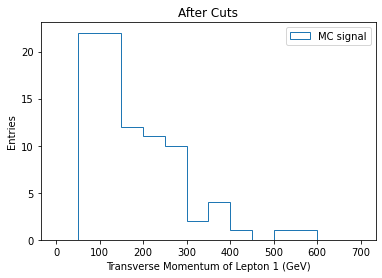

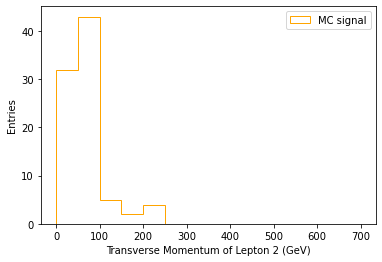

In [42]:
lep1PT_cut = []
lep2PT_cut = []
for i in prapidity_cut_df['lep_pt']:
    lep1PT_cut.append(i[0]*0.001)#decrease by a factor of 10^3 for TeV -> GeV
    lep2PT_cut.append(i[1]*0.001)
    
lep1PT_cut_hist = plt.hist(lep1PT_cut, bins=np.linspace(0,700,15), histtype='step', label='MC signal')
plt.xlabel('Transverse Momentum of Lepton 1 (GeV)')
plt.ylabel('Entries')
plt.title('After Cuts')
plt.legend()
plt.show()
lep2PT_cut_hist = plt.hist(lep2PT_cut, bins=np.linspace(0,700,15), histtype='step', color='orange', label='MC signal')
plt.xlabel('Transverse Momentum of Lepton 2 (GeV)')
plt.ylabel('Entries')
plt.legend()
plt.show()

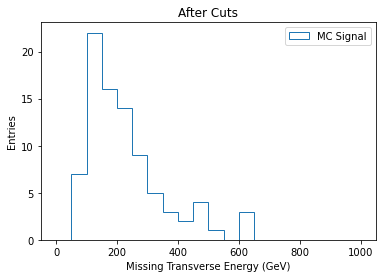

In [43]:
lepMET_hist = plt.hist(prapidity_cut_df['met_et']*0.001, bins=np.linspace(0,1000,21), histtype='step', label='MC Signal')
plt.xlabel('Missing Transverse Energy (GeV)')
plt.ylabel('Entries')
plt.title('After Cuts')
plt.legend()
plt.show()